# Principal Component Analysis (PCA)
Principal Component Analysis (PCA), is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("seeds.csv")
df.dropna(inplace = True)

In [7]:
X = df[["Kernel.Length", "Kernel.Width","Asymmetry.Coeff","Kernel.Groove"]].to_numpy()
y=df['Type']

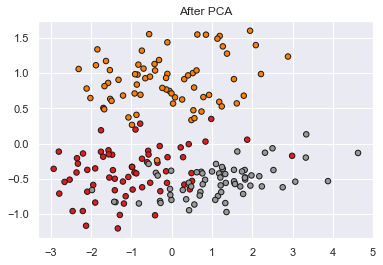

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

newX = pca.transform(X)

plt.scatter(
    newX[:,0],
    newX[:,1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=30,
)
plt.title("After PCA")
plt.show()

In [9]:
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.79422642 0.18875343]
per_var = [79.42 18.88] 



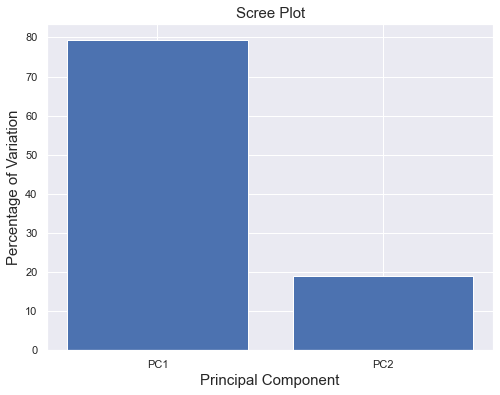

In [10]:
labels = [f"PC{i}" for i in range(1,3)]

plt.figure(figsize = (8, 6))
plt.bar(x = range(1, 3), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [11]:
features = ["Kernel.Length", "Kernel.Width","Asymmetry.Coeff","Kernel.Groove"]
#features
pca.components_
pd.DataFrame(data = pca.components_, index = labels, columns = features)

,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
PC1,-0.062281,-0.074099,0.995218,-0.013121
PC2,0.594317,0.446361,0.079184,0.664289


According to the previous table, the Asymmetry.Coeff is has the largest PCA. Then, we will do another PCA without setting the number of components.

In [12]:
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68310395 0.25188611 0.05524353 0.0097664 ]
per_var = [68.31 25.19  5.52  0.98] 



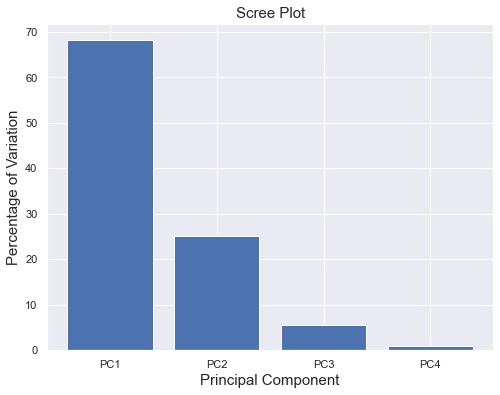

In [13]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (8, 6))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [14]:
pca.components_
pd.DataFrame(data = pca.components_, index = labels, columns = features)

,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
PC1,0.594044,0.558802,-0.140923,0.561243
PC2,0.067436,-0.077203,0.963473,0.247409
PC3,-0.182820,0.792112,0.215222,-0.541123
PC4,0.780475,-0.233105,0.074427,-0.575310


In [17]:
pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df["Type"] = df.Type.to_numpy()
pca_df

,PC1,PC2,PC3,PC4,Type
0,0.142536,-1.062824,0.052131,0.342599,1
1,-0.292901,-2.021741,0.296788,0.208992,1
2,-0.951097,-1.024868,0.804632,-0.018773,1
3,-0.825184,-1.327397,0.836643,0.014585,1
4,0.403544,-1.721227,0.542803,0.011717,1
...,...,...,...,...,...
194,-1.723124,-0.340918,0.208154,-0.075910,3
195,-1.909291,0.220213,-0.228152,-0.076211,3
196,-1.455965,2.791895,1.176317,-0.036485,3
197,-1.684953,-0.239539,-0.308322,-0.124668,3


In [33]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]
pca_df["color"] = c

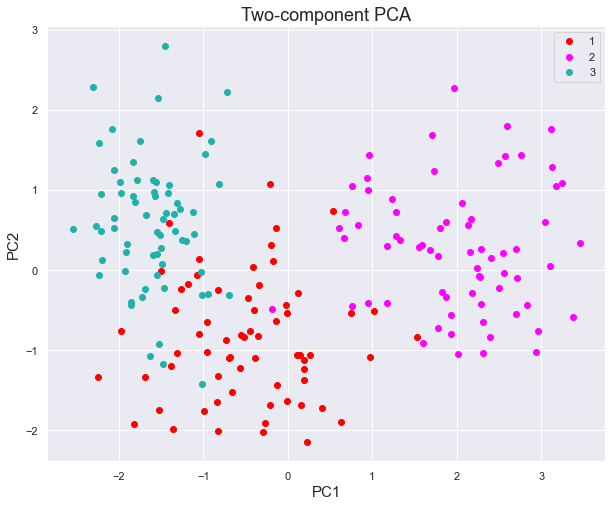

In [34]:
targets = [1,2,3]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['Type'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()